### Este notebook lida com a simulacao de Monte Carlo para previsao do consumo de energia, considerando variaveis meteorologicas, de conforto e variacoes inesperadas.

##### Importar bibliotecas

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time

##### Parâmetros Técnicos

In [17]:
# Parametros considerados no modelo
n_simulations = 1000  # Quantidade de simulacoes
n_days = 30  # Quantidade de dias

# Nivel de consumo de energia (kW.h)
alpha = 280  # media conhecida e tomada por um long periodo

# Variaveis meteorologicas e humanas
mean_temp = 20  # Temperatura media, depende da janela de tempo etc.
temp_std = 5  # desvio padrao da serie temporal de temperatura
temp_frio = 13  # temperatura limite para conforto (acima = ArCond, abaixo = aquecimento)
temp_calor = 18 # temperatura limite para conforto (ar condicioinado)
beta_weather = 0.5  # sensibilidade devido ao clima
beta_heating = 2.0  # importancia do aquecimento qdo a temperatura abaixa

# Fatores Humanos
mean_behavior = 1.0  # Fator de importancia da variabilidade de pessoas
behavior_std = 0.2  # Desvio padrao da variabilidade humana

# Ruido ou fatores imprevisiveis
noise_std = 5  # desvio padrao dos fatores imprevisiveis


In [18]:
# Simulacao de Monte Carlo
simulated_energy_consumption = []

for i in range(n_simulations):
    daily_temps = np.random.normal(mean_temp, temp_std, n_days)
    user_behavior = np.random.normal(mean_behavior, behavior_std, n_days)

    # Consumo de energia -- serie para receber resultados
    energy_consumption_path = []

    for t in range(n_days):
        # Impacto das variaveis meteorologicas
        if daily_temps[t] < temp_frio:
            heating_demand = beta_heating * (temp_threshold - daily_temps[t])  # Inicio do aquecimento
        else:
            heating_demand = 0
        if daily_temps[t] > temp_calor:
            cooling_demand = beta_heating * (daily_temps[t] - temp_calor)  # Inicio do ar condicionado
        else:
            cooling_demand = 0

        # Equacao do Consumo de Energia
        energy_t = (
            alpha +  # Valor Historico ou media de longo prazo
            beta_weather * daily_temps[t] +  # meteorologia
            heating_demand +  # demanda de aquecimento
            cooling_demand +  # demanda de ar condicionado
            user_behavior[t] * alpha +  # caracteristica do uso humano
            np.random.normal(0, noise_std)  # fatores imprevisiveis
        )

        energy_consumption_path.append(energy_t)

    simulated_energy_consumption.append(energy_consumption_path)

# Transformacao para array
simulated_energy_consumption = np.array(simulated_energy_consumption)


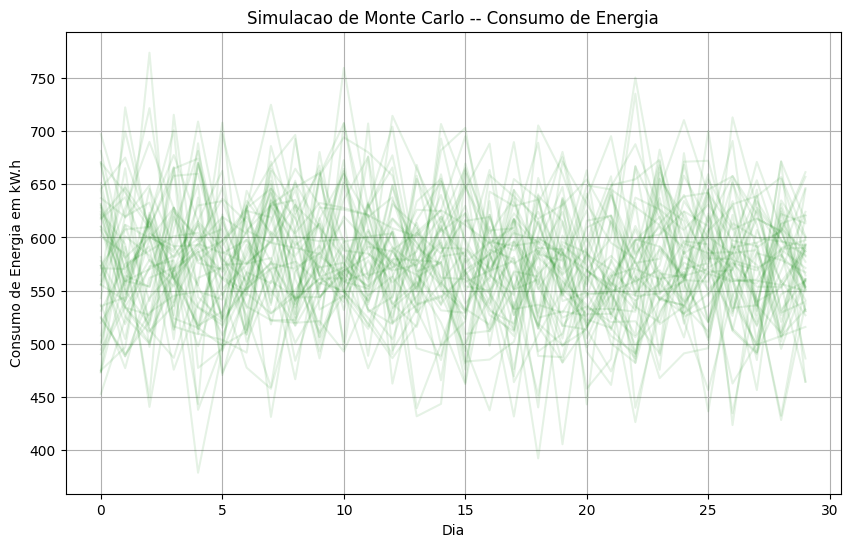

In [19]:
# Plotagem de Figuras
plt.figure(figsize=(10, 6))
for i in range(50):  # plotagem de numero menor para visualizacao
    plt.plot(simulated_energy_consumption[i], color='green', alpha=0.1)

plt.title('Simulacao de Monte Carlo -- Consumo de Energia')
plt.xlabel('Dia')
plt.ylabel('Consumo de Energia em kW.h')
plt.grid(True)
plt.show()

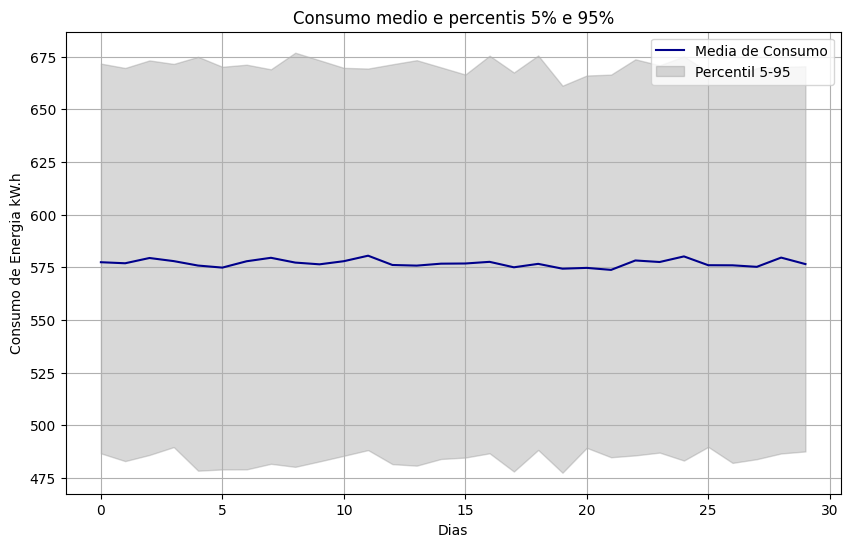

In [20]:
# Caracteristicas estatisticas (media e percentis)
average_consumption = np.mean(simulated_energy_consumption, axis=0)
p5 = np.percentile(simulated_energy_consumption, 5, axis=0) # delimitacao de outlier inferior (5%)
p95 = np.percentile(simulated_energy_consumption, 95, axis=0) # delimitacao de outlier superior (95%)

# Figura com caracteristicas estatisticas
plt.figure(figsize=(10, 6))
plt.plot(average_consumption, label='Media de Consumo', color='darkblue')
plt.fill_between(range(n_days), p5, p95, color='gray', alpha=0.3, label='Percentil 5-95')
plt.title('Consumo medio e percentis 5% e 95%')
plt.xlabel('Dias')
plt.ylabel('Consumo de Energia kW.h')
plt.legend()
plt.grid(True)
plt.show()